<a href="https://colab.research.google.com/github/rezendervp/chemical-engineering/blob/main/Funcional_da_matriz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

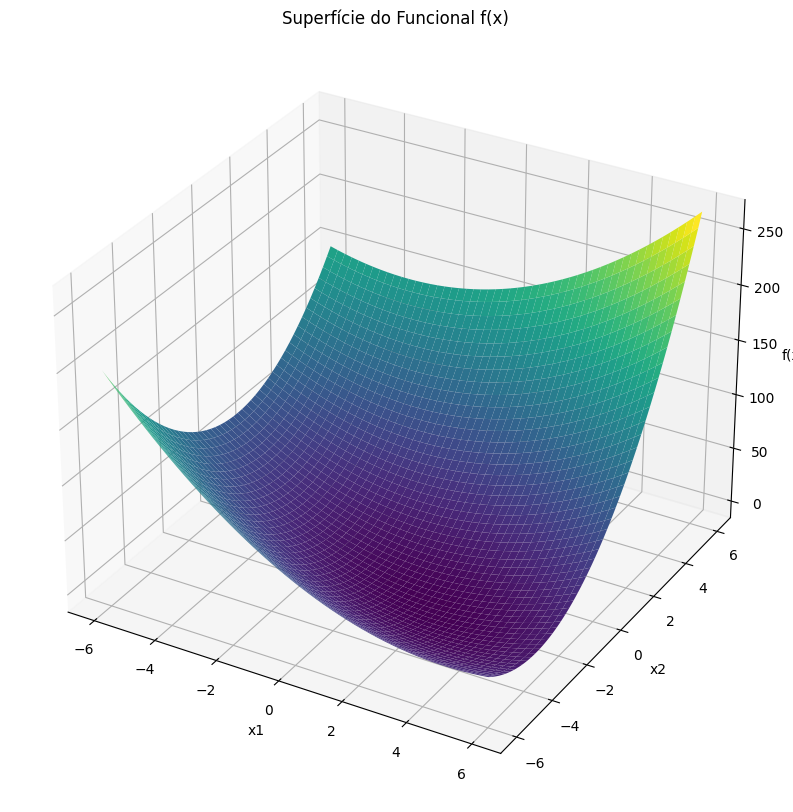

In [25]:
# Gráfico do Funcional da Matriz de Coeficientes de um Sistema Linear 2x2



import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo a matriz A e o vetor b
A = np.array([[3, 2], [2, 6]])
b = np.array([2, -8])

# Definindo o funcional f(x)
def f(x1, x2):
    term1 = 0.5 * (A[0,0] * x1**2 + (A[0,1] + A[1,0]) * x1 * x2 + A[1,1] * x2**2)
    term2 = b[0] * x1 + b[1] * x2
    return term1 - term2

# Criando a grade de valores para x1 e x2
x1 = np.linspace(-6, 6, 400)
x2 = np.linspace(-6, 6, 400)
X1, X2 = np.meshgrid(x1, x2)

# Calculando f(x) para cada par (x1, x2)
F = f(X1, X2)

# Plotando a superfície
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, F, cmap='viridis')

# Adicionando rótulos
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Superfície do Funcional f(x)')

plt.show()




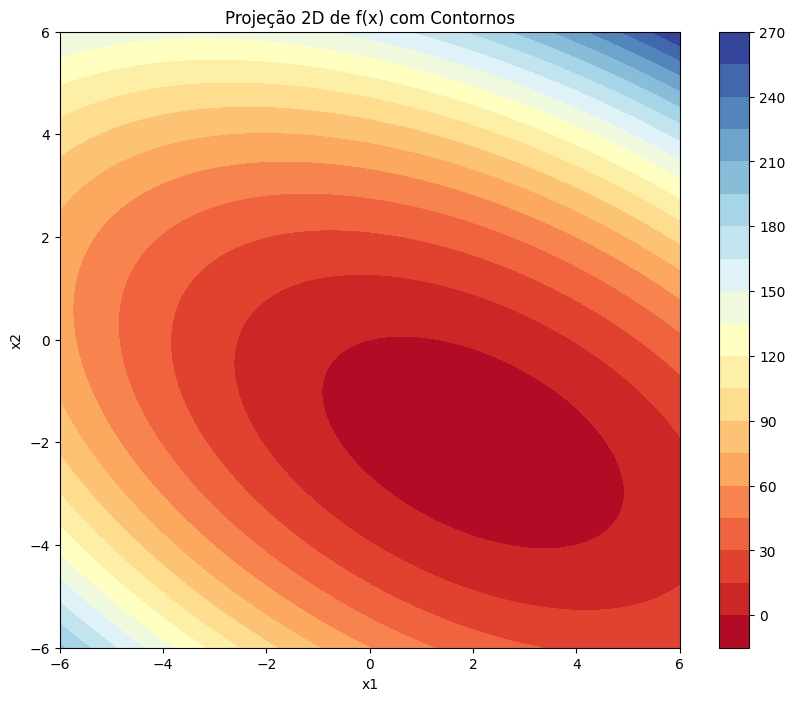

In [26]:
# Plotando a projeção 2D com contornos
fig = plt.figure(figsize=(10, 8))
contour = plt.contourf(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour)

# Adicionando rótulos
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projeção 2D de f(x) com Contornos')

plt.show()

In [27]:
# Resolvendo o sistema linear

# Encontrando o ponto de mínimo resolvendo o sistema linear A * x = b
x_min = np.linalg.solve(A, b)

print("O ponto de mínimo é:", x_min)

O ponto de mínimo é: [ 2. -2.]


In [28]:
#Verificando que a solução é o ponto mínimo do funcional f(x):

# Verificando se o gradiente é zero no ponto de mínimo
gradient = np.dot(A, x_min) - b
print("Gradiente no ponto de mínimo:", gradient)

Gradiente no ponto de mínimo: [0. 0.]


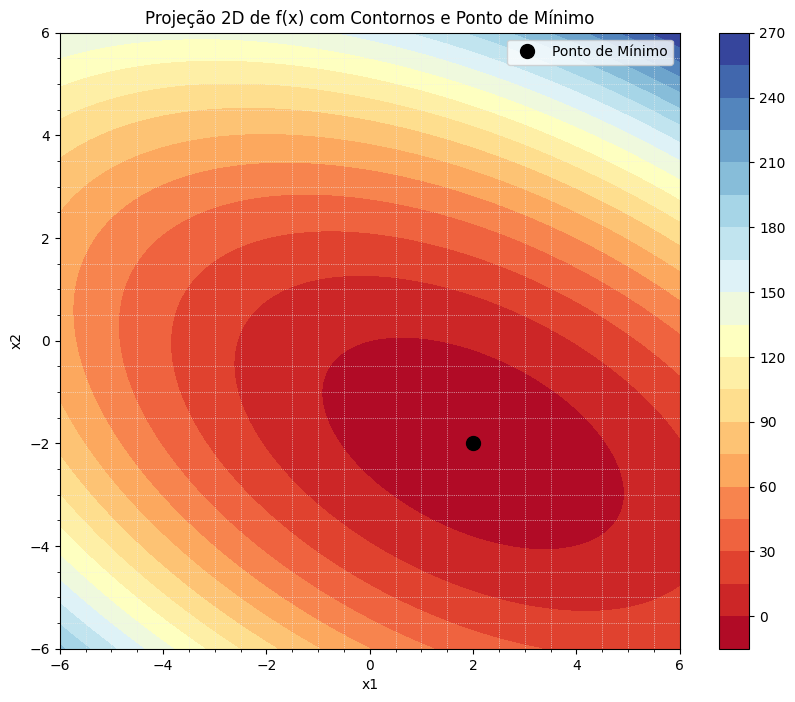

In [29]:
#Idenfificando graficamente:

# Plotando a projeção 2D com contornos
fig = plt.figure(figsize=(10, 8))
contour = plt.contourf(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour)

# Adicionando o ponto de mínimo ao gráfico
plt.plot(x_min[0], x_min[1], 'ko', markersize=10, label='Ponto de Mínimo')

# Adicionando rótulos e título
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projeção 2D de f(x) com Contornos e Ponto de Mínimo')
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)


plt.show()

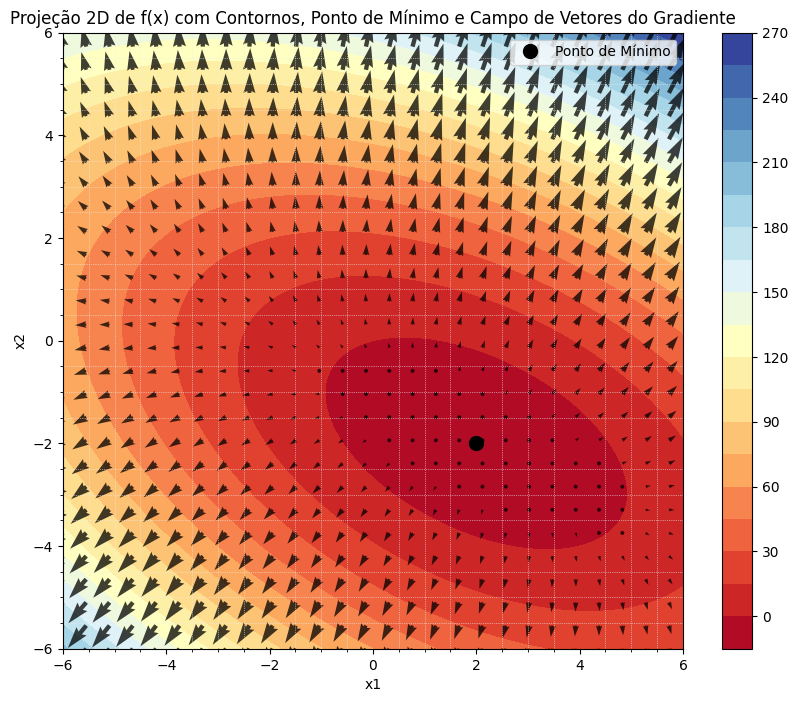

In [30]:
#Adicionando campo gradiente ao gráfico

# Calculando o gradiente de f(x) em cada ponto da grade
grad_f_x1 = A[0,0] * X1 + A[0,1] * X2 - b[0]
grad_f_x2 = A[1,0] * X1 + A[1,1] * X2 - b[1]

# Subamostrando a grade para reduzir a densidade dos vetores
skip = 15 # Pula de 10 em 10
X1_sub = X1[::skip, ::skip]
X2_sub = X2[::skip, ::skip]
grad_f_x1_sub = grad_f_x1[::skip, ::skip]
grad_f_x2_sub = grad_f_x2[::skip, ::skip]

# Plotando a projeção 2D com contornos
fig = plt.figure(figsize=(10, 8))
contour = plt.contourf(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour)

# Adicionando o ponto de mínimo ao gráfico
plt.plot(x_min[0], x_min[1], 'ko', markersize=10, label='Ponto de Mínimo')

# Adicionando o campo de vetores do gradiente
plt.quiver(X1_sub, X2_sub, grad_f_x1_sub, grad_f_x2_sub, color='black', alpha=0.75, scale=1000,width=0.007)

# Adicionando rótulos e título
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projeção 2D de f(x) com Contornos, Ponto de Mínimo e Campo de Vetores do Gradiente')
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

plt.show()

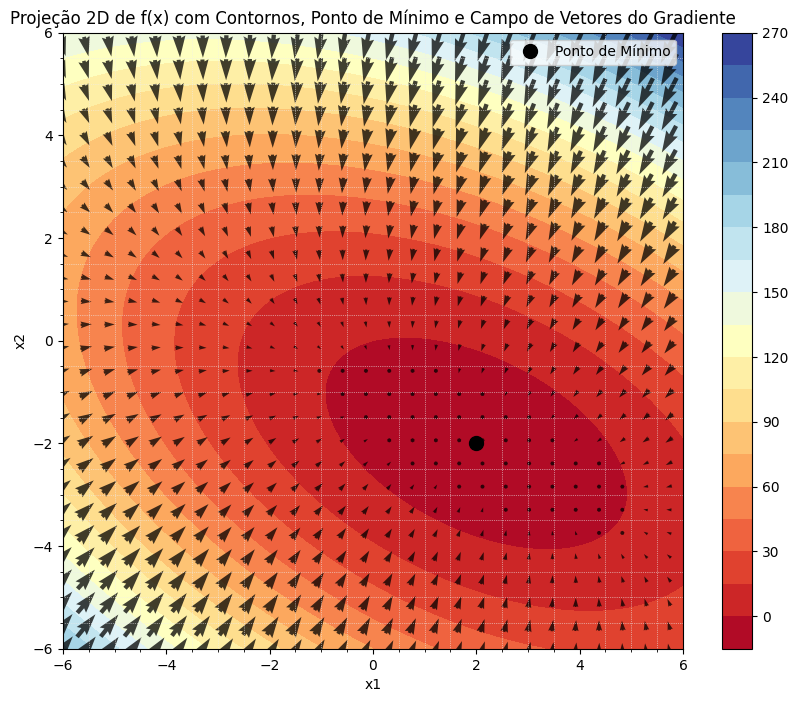

In [31]:
#O mesmo mas agora seguindo a direção oposta a dada por Grad(f) - a direção de minimização (ou maximização)

#Adicionando campo gradiente ao gráfico

# Calculando o gradiente de f(x) em cada ponto da grade
grad_f_x1 = A[0,0] * X1 + A[0,1] * X2 - b[0]
grad_f_x2 = A[1,0] * X1 + A[1,1] * X2 - b[1]

# Subamostrando a grade para reduzir a densidade dos vetores
skip = 15 # Pula de 10 em 10
X1_sub = X1[::skip, ::skip]
X2_sub = X2[::skip, ::skip]
grad_f_x1_sub = -grad_f_x1[::skip, ::skip]  #mudando o sinal das componentes (+)->(-)
grad_f_x2_sub = -grad_f_x2[::skip, ::skip]

# Plotando a projeção 2D com contornos
fig = plt.figure(figsize=(10, 8))
contour = plt.contourf(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour)

# Adicionando o ponto de mínimo ao gráfico
plt.plot(x_min[0], x_min[1], 'ko', markersize=10, label='Ponto de Mínimo')

# Adicionando o campo de vetores do gradiente
plt.quiver(X1_sub, X2_sub, grad_f_x1_sub, grad_f_x2_sub, color='black', alpha=0.75, scale=1000,width=0.007,pivot='mid')

# Adicionando rótulos e título
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projeção 2D de f(x) com Contornos, Ponto de Mínimo e Campo de Vetores do Gradiente')
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

plt.show()

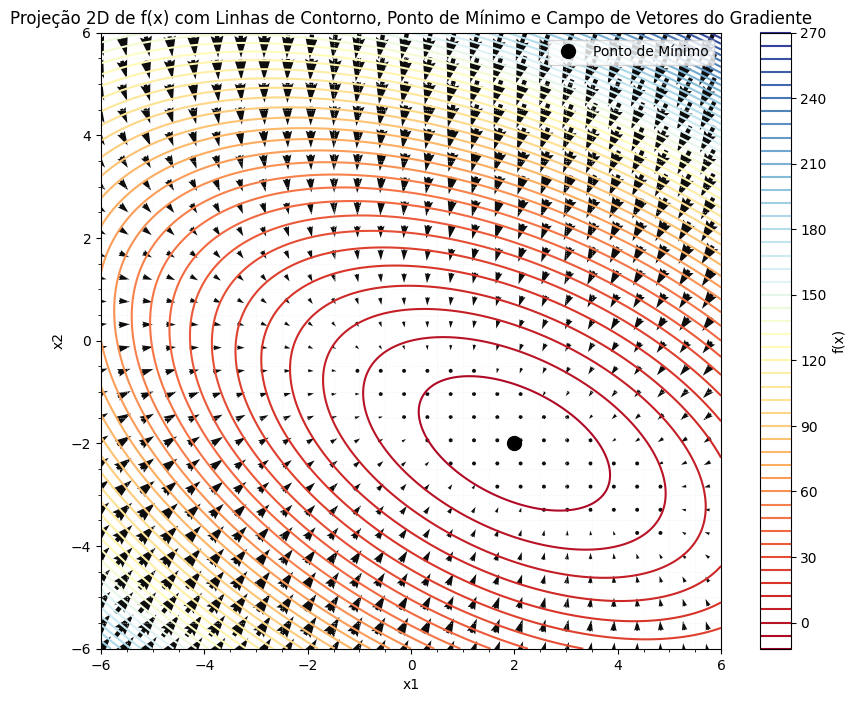

In [32]:
# Plotando a projeção 2D com linhas de contorno coloridas
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(X1, X2, F, levels=51, cmap='RdYlBu')
plt.colorbar(contour, ax=ax, label='f(x)')


# Adicionando o ponto de mínimo ao gráfico
plt.plot(x_min[0], x_min[1], 'ko', markersize=10, label='Ponto de Mínimo')

# Adicionando o campo de vetores do gradiente com vetores mais espessos
plt.quiver(X1_sub, X2_sub, grad_f_x1_sub, grad_f_x2_sub, color='black', alpha=0.95, scale=1000, width=0.007,pivot='mid')

# Adicionando rótulos e título
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projeção 2D de f(x) com Linhas de Contorno, Ponto de Mínimo e Campo de Vetores do Gradiente')
plt.legend()
plt.minorticks_on()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

In [33]:
#Método Steepest Descent

# Ponto inicial
x0 = np.array([-6, 6])

Número total de iterações: 836
A solução encontrada é :
[ 1.99999956 -1.99999978]
A norma L2 do erro é:
9.9255713220525e-07


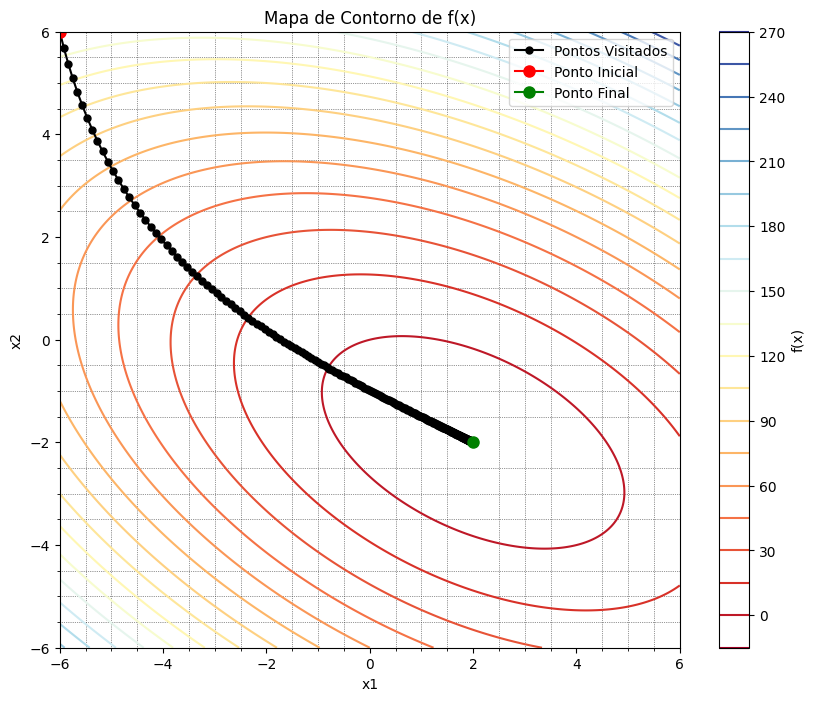

In [39]:
def steepest_descent(A, b, x0, alpha=0.01, tol=1e-6, max_iter=1000):
    x = x0.copy()  # Ponto inicial
    x_hist = [x.copy()]  # Histórico de pontos visitados
    for i in range(max_iter):
        # Gradiente da função objetivo
        gradient = np.dot(A, x) - b

        # Critério de parada: norma do gradiente
        if np.linalg.norm(gradient) < tol:
            break

        # Atualização do ponto usando o método do gradiente descendente
        x = x - alpha * gradient

        # Armazenando o novo ponto
        x_hist.append(x.copy())

        # Imprimir o número de iterações
    print("Número total de iterações:", len(x_hist) - 1)
    print('A solução encontrada é :')
    print(x)
    print('A norma L2 do erro é:')
    r = b - np.dot(A, x)
    print(np.linalg.norm(r))

    return np.array(x_hist)


# Aplicando o método do Gradiente Descendente
x_hist = steepest_descent(A, b, x0)

# Calculando f(x) para cada ponto visitado
f_hist = [0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x) for x in x_hist]



# Plotando o mapa de contorno de f(x)
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour, label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mapa de Contorno de f(x)')
plt.minorticks_on()
plt.grid(which='minor', color='#333333', linestyle=':', linewidth=0.5)

# Plotando os pontos visitados sobre o mapa de contorno
plt.plot(x_hist[:, 0], x_hist[:, 1], marker='o', color='black', markersize=5, label='Pontos Visitados')
plt.plot(x_hist[0, 0], x_hist[0, 1], marker='o', color='red', markersize=8, label='Ponto Inicial')
plt.plot(x_hist[-1, 0], x_hist[-1, 1], marker='o', color='green', markersize=8, label='Ponto Final')
plt.legend()


plt.show()



Número total de iterações: 29
A solução encontrada é :
[ 1.99999964 -1.99999992]
A norma L2 do erro é:
9.440607097297656e-07


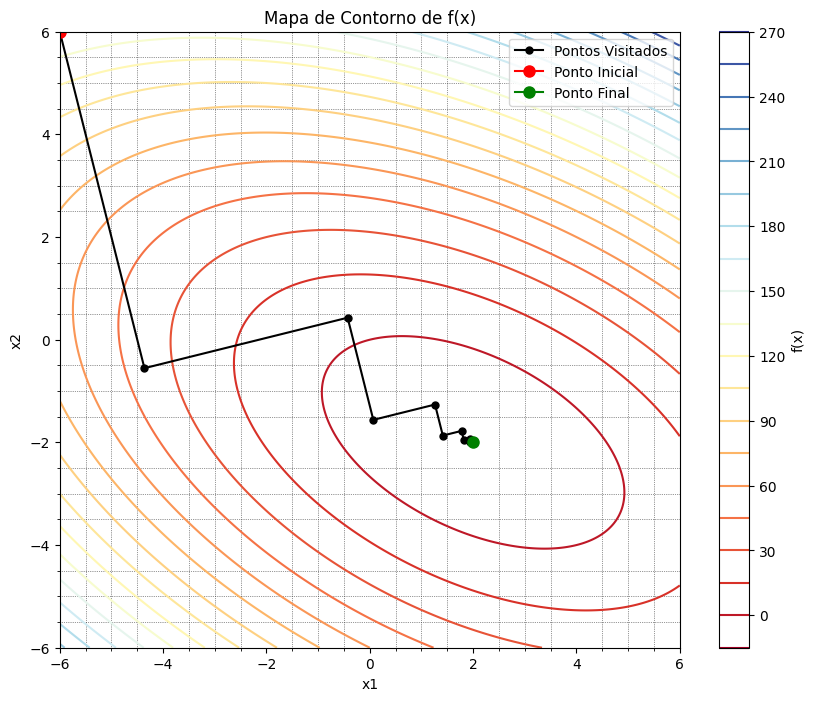

In [41]:
def steepest_descent(A, b, x0, tol=1e-6, max_iter=1000):
    x = x0.copy()  # Ponto inicial
    r = b - np.dot(A, x)  # Resíduo inicial
    x_hist = [x.copy()]  # Histórico de pontos visitados
    for i in range(max_iter):
        # Critério de parada: norma do residuo
        if np.linalg.norm(r) < tol:
            break

        # Calculando o tamanho do passo
        alpha = np.dot(r, r) / np.dot(r, np.dot(A, r))

        # Atualizando o ponto
        x = x + alpha * r

        # Atualizando o residuo
        r = r - alpha * np.dot(A, r)

        # Armazenando o novo ponto
        x_hist.append(x.copy())

        # Imprimir o número de iterações
    print("Número total de iterações:", len(x_hist) - 1)
    print('A solução encontrada é :')
    print(x)
    print('A norma L2 do erro é:')
    print(np.linalg.norm(r))

    return np.array(x_hist)


# Aplicando o método do Gradiente Descendente
x_hist = steepest_descent(A, b, x0)

# Calculando f(x) para cada ponto visitado
f_hist = [0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x) for x in x_hist]

# Plotando o mapa de contorno de f(x)
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, F, levels=21, cmap='RdYlBu')
plt.colorbar(contour, label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mapa de Contorno de f(x)')
plt.minorticks_on()
plt.grid(which='minor', color='#333333', linestyle=':', linewidth=0.5)

# Plotando os pontos visitados sobre o mapa de contorno
plt.plot(x_hist[:, 0], x_hist[:, 1], marker='o', color='black', markersize=5, label='Pontos Visitados')
plt.plot(x_hist[0, 0], x_hist[0, 1], marker='o', color='red', markersize=8, label='Ponto Inicial')
plt.plot(x_hist[-1, 0], x_hist[-1, 1], marker='o', color='green', markersize=8, label='Ponto Final')
plt.legend()

plt.show()



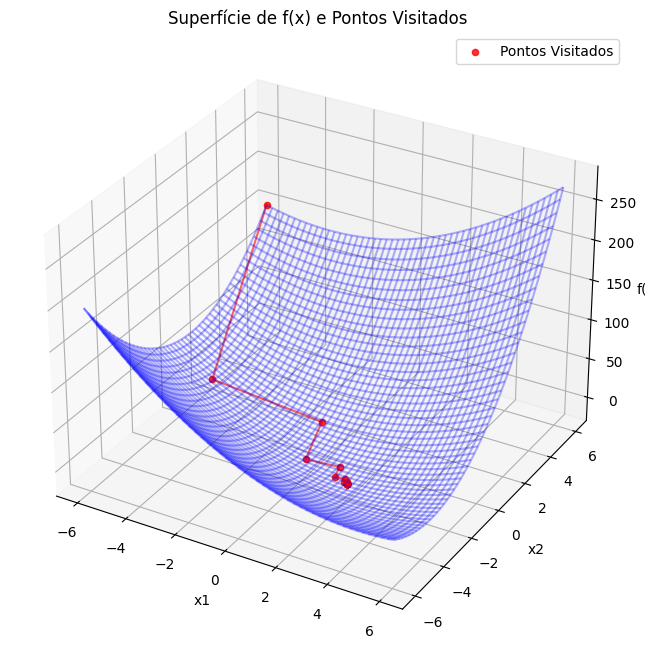

In [42]:
# Plotando a superfície em forma de malha
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot da superfície em forma de malha com transparência
ax.plot_wireframe(X1, X2, F, color='blue', alpha=0.3)

# Plotando os pontos visitados como esferas pequenas e opacas
x_hist_f = [0.5 * np.dot(x, np.dot(A, x)) - np.dot(b, x) for x in x_hist]
ax.scatter(x_hist[:, 0], x_hist[:, 1], x_hist_f, color='red', s=20, alpha=0.8, label='Pontos Visitados', depthshade=False)

# Ligando os pontos visitados por linhas
ax.plot(x_hist[:, 0], x_hist[:, 1], x_hist_f, color='red', alpha=0.6)

# Configurações adicionais
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Superfície de f(x) e Pontos Visitados')
ax.legend()

plt.show()
